# import image data

In [7]:
# load data from url
import pandas as pd

url = "https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/edu/sfac-simm71/cv-project-data.tsv"
df = pd.read_csv(url, sep="\t", header=None)
df.head(3)

,0
0,https://raw.githubusercontent.com/nils-holmber...
1,https://raw.githubusercontent.com/nils-holmber...
2,https://raw.githubusercontent.com/nils-holmber...


In [8]:
# save data from url
import urllib.request

for index, url in df.iterrows():
  fp = "".join(["image-", f"{index:03d}", ".jpg"])
  urllib.request.urlretrieve(url[0], fp)

In [ ]:
# save data from zip
import urllib.request

url = "https://docs.google.com/uc?export=download&id=1dyfgS_WM6bkrBBZ8ZiPN5QsqaO199DLh"
fp = "cv-project-data.zip"
urllib.request.urlretrieve(url, fp)

In [ ]:
# load data from dir
import os

for img in os.listdir("cv-project-data"):
  fn = os.fsdecode(img)
  print(fn)

# perform object detection

In [5]:
!pip install -q transformers
!pip install -q timm
from transformers import pipeline
model = pipeline("object-detection")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 10.8 MB/s eta 0:00:00


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Downloading:   0%|          | 0.00/274 [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/detr/image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [6]:
model("image-000.jpg")

[{'score': 0.9947804808616638,
  'label': 'person',
  'box': {'xmin': 119, 'ymin': 14, 'xmax': 635, 'ymax': 358}}]

In [20]:
import glob

rows_list = []
for img in sorted(glob.glob('image-*.jpg')):
  dict1 = {}
  res = model(img)
  dict1.update({"image": img, "result": res})
  rows_list.append(dict1)

df = pd.DataFrame(rows_list)

In [37]:
df.head()

,image,result
0,image-000.jpg,"[{'score': 0.9947804808616638, 'label': 'perso..."
1,image-001.jpg,"[{'score': 0.9941784143447876, 'label': 'perso..."
2,image-002.jpg,"[{'score': 0.9460713863372803, 'label': 'perso..."
3,image-003.jpg,"[{'score': 0.9324580430984497, 'label': 'perso..."
4,image-004.jpg,"[{'score': 0.9773542284965515, 'label': 'bowl'..."


# analyze results

In [38]:
rows_list = []
for index, row in df.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    rows_list.append(dict1)

df_res = pd.DataFrame(rows_list)

In [41]:
df_res.head()

,image,score,label,box
0,image-000.jpg,0.994780,person,"{'xmin': 119, 'ymin': 14, 'xmax': 635, 'ymax':..."
1,image-001.jpg,0.994178,person,"{'xmin': 0, 'ymin': 0, 'xmax': 290, 'ymax': 358}"
2,image-001.jpg,0.985998,person,"{'xmin': 341, 'ymin': 92, 'xmax': 639, 'ymax':..."
3,image-002.jpg,0.946071,person,"{'xmin': 41, 'ymin': 38, 'xmax': 494, 'ymax': ..."
4,image-003.jpg,0.932458,person,"{'xmin': 0, 'ymin': 63, 'xmax': 362, 'ymax': 358}"


# visualize data

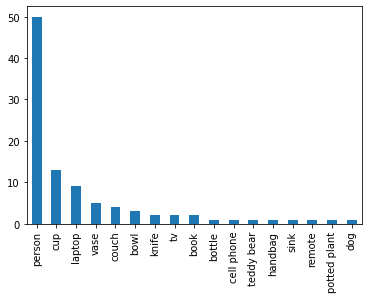

In [58]:
df_res.label.value_counts().plot(kind='bar')

In [43]:
df_res[df_res.image=="image-005.jpg"]

,image,score,label,box
15,image-005.jpg,0.997449,person,"{'xmin': 474, 'ymin': 30, 'xmax': 639, 'ymax':..."
16,image-005.jpg,0.996459,cup,"{'xmin': 448, 'ymin': 244, 'xmax': 483, 'ymax'..."
17,image-005.jpg,0.901338,knife,"{'xmin': 290, 'ymin': 211, 'xmax': 323, 'ymax'..."
18,image-005.jpg,0.983521,person,"{'xmin': 166, 'ymin': 59, 'xmax': 335, 'ymax':..."
19,image-005.jpg,0.915080,person,"{'xmin': 65, 'ymin': 54, 'xmax': 140, 'ymax': ..."
20,image-005.jpg,0.992277,person,"{'xmin': 27, 'ymin': 19, 'xmax': 256, 'ymax': ..."
21,image-005.jpg,0.983366,bowl,"{'xmin': 488, 'ymin': 261, 'xmax': 533, 'ymax'..."
22,image-005.jpg,0.992759,cup,"{'xmin': 363, 'ymin': 228, 'xmax': 389, 'ymax'..."
23,image-005.jpg,0.974573,cup,"{'xmin': 381, 'ymin': 229, 'xmax': 407, 'ymax'..."


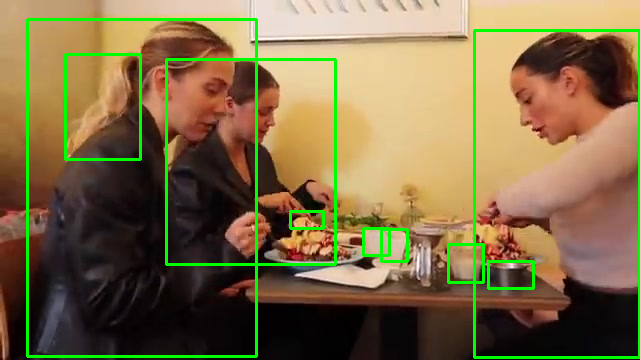

In [57]:
import cv2

img = cv2.imread('image-005.jpg')
for index,row in df_res[df_res.image=="image-005.jpg"].iterrows():
  x1,y1,x2,y2 = list(row.box.values())
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
#cv2.imwrite("objects.png", img)

# try detectron2

In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=e3caab0a6d9099f12789049101344a3d15fea922743804344a5fc59414b02b4b
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Cloning into 'detectron2'...
remote: Enumerating objects: 14750, done.
remote: Cou

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

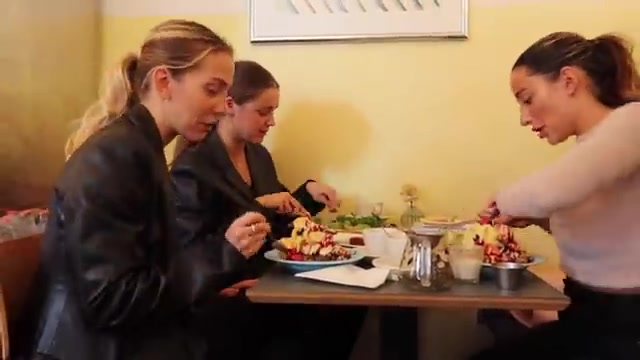

In [9]:
img = cv2.imread('image-005.jpg')
cv2_imshow(img)

In [10]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

[01/11 07:25:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0, 41, 60, 60, 75, 55, 45], device='cuda:0')
Boxes(tensor([[481.0275,  32.7572, 640.0000, 355.7880],
        [169.2369,  58.9165, 339.6255, 320.9010],
        [ 33.4217,  15.0124, 236.9824, 354.8803],
        [447.5954, 245.7929, 484.4416, 284.0352],
        [212.0805, 223.0865, 578.5974, 336.1739],
        [252.3086, 252.2159, 569.2345, 307.0580],
        [399.4966, 194.0043, 424.2531, 230.8443],
        [276.0072, 216.1202, 352.3693, 258.7815],
        [262.8219, 244.5914, 364.5141, 270.1786]], device='cuda:0'))


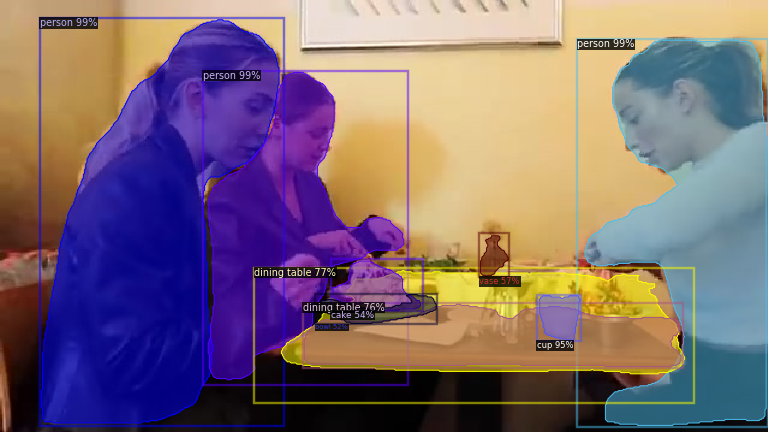

In [13]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

[01/11 07:28:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl ...


model_final_a6e10b.pkl: 237MB [00:06, 36.4MB/s]                           


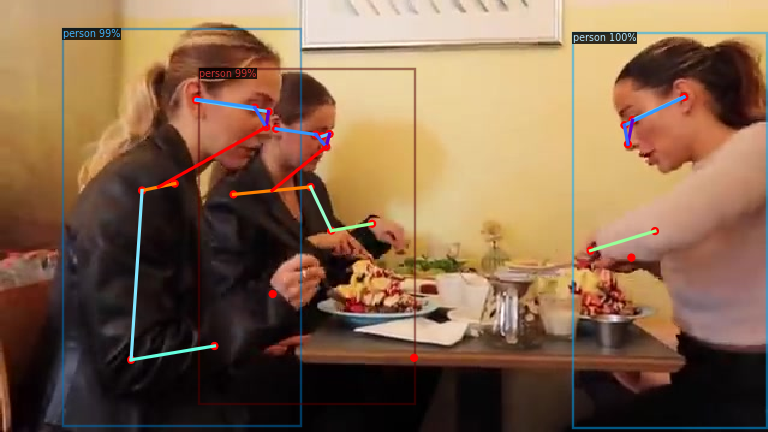

In [14]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)
v = Visualizer(img[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

[01/11 07:28:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...


model_final_cafdb1.pkl: 261MB [00:06, 39.9MB/s]                           


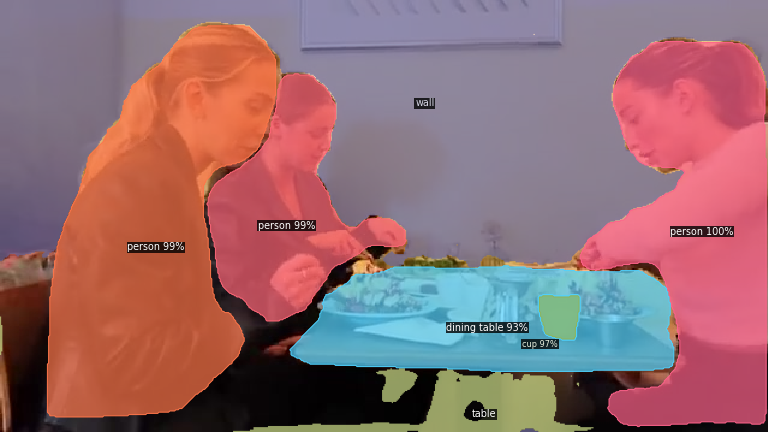

In [15]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(img)["panoptic_seg"]
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

# video analysis

In [16]:
# load data from url
import urllib.request
url = "https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/vid/clip.mp4"
fp = "video.mp4"
urllib.request.urlretrieve(url, fp)
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [17]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
# Note: this is currently BROKEN due to missing codec. See https://github.com/facebookresearch/detectron2/issues/2901 for workaround.
%run detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

fatal: destination path 'detectron2' already exists and is not an empty directory.
[01/11 07:29:37 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[01/11 07:29:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...
[01/11 07:29:38 fvcore.common.checkpoint]: [Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...
[01/11 07:29:38 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'


 98%|█████████▊| 153/156 [00:43<00:00,  3.53it/s]


In [18]:
# Download the results
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# image similarity

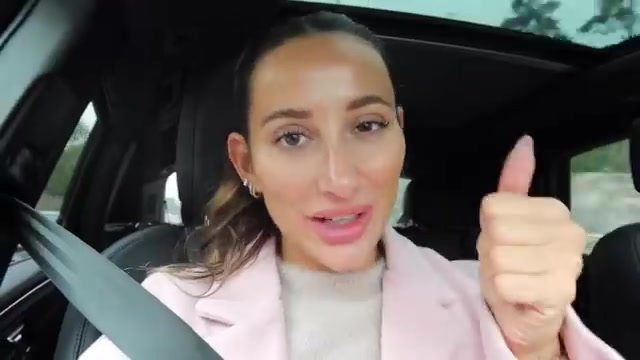

In [ ]:
# load video frame as image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("vid-sep-000001.jpg")
cv2_imshow(img)

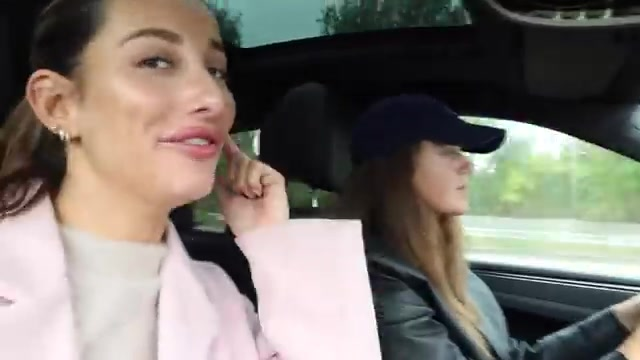

In [ ]:
new = cv2.imread("vid-sep-000002.jpg")
cv2_imshow(new)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

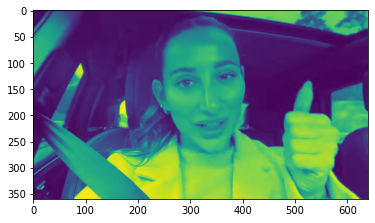

In [ ]:
ref_image = imread('vid-sep-000001.jpg')
ref_image = rgb2gray(ref_image)
ref_image = img_as_float(ref_image)
#ref_image.shape
plt.imshow(ref_image)

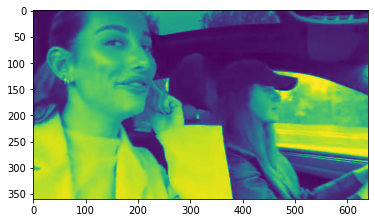

In [ ]:
new_image = imread('vid-sep-000002.jpg')
new_image = rgb2gray(new_image)
new_image = img_as_float(new_image)
#new_image.shape
plt.imshow(new_image)

In [ ]:
rows, cols = ref_image.shape

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(ref_image, ref_image)
ssim_none = ssim(ref_image, ref_image, data_range=ref_image.max()-ref_image.min())

mse_new = mean_squared_error(ref_image, new_image)
ssim_new = ssim(ref_image, new_image, data_range=new_image.max()-new_image.min())

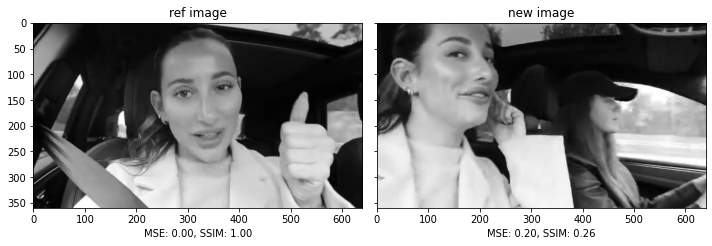

In [ ]:
ax[0].imshow(ref_image, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('ref image')

ax[1].imshow(new_image, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_new:.2f}, SSIM: {ssim_new:.2f}')
ax[1].set_title('new image')

plt.tight_layout()
plt.show()

# face detection

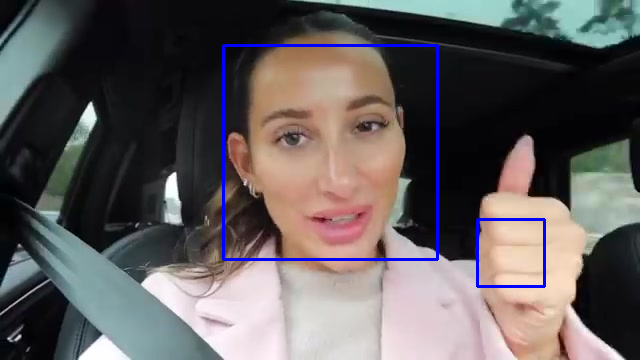

In [ ]:
import cv2

# Load the cascade
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# Read the input image
img = cv2.imread('vid-sep-000001.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
#cv2.imshow('img', img)
#cv2.waitKey()
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
cv2.imwrite("haar-face.png", img)

True